<h1>Section 1: Import Libraries</h1>

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

<h1>Section 2: Data Loading and Preparation</h1>

In [9]:
# -----------------------------
# Step 1: Prepare Dataset
# -----------------------------
try:
    # Try loading dataset from CSV
    df = pd.read_csv('salary_data.csv')
    print("Loaded dataset from CSV.")
except FileNotFoundError:
    # If CSV doesn't exist, create synthetic dataset
    np.random.seed(42)
    n_samples = 300
    years_experience = np.random.randint(1, 21, n_samples)
    salaries = 40000 + years_experience * 2000 + np.random.normal(0, 5000, n_samples)
    
    df = pd.DataFrame({
        'years_of_experience': years_experience,
        'salary': salaries.round(2)
    })
    print("CSV not found. Generated synthetic dataset.")

CSV not found. Generated synthetic dataset.


<h1>Section 3: Data Exploration</h1>

In [10]:
# Display basic information
print("\nDataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Dataset shape: (300, 2)

First 5 rows:
   years_of_experience    salary
0                    7  57550.55
1                   20  80462.39
2                   15  73150.37
3                   11  70814.69
4                    8  57154.77

Missing values:
years_of_experience    0
salary                 0
dtype: int64

Statistical Summary:
       years_of_experience        salary
count           300.000000    300.000000
mean              9.930000  60392.031933
std               6.088404  12851.618890
min               1.000000  30585.990000
25%               4.000000  49944.037500
50%               9.000000  59263.260000
75%              16.000000  70815.312500
max              20.000000  89870.710000


<h1>Section 4: Feature-Target Separation</h1>

In [11]:
# -----------------------------
# Step 2: Separate Features & Target
# -----------------------------
X = df[['years_of_experience']]  # Features
y = df['salary']                 # Target

<h1>Section 5: Train-Test Split</h1>

In [12]:
# -----------------------------
# Step 3: Split Dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 240
Testing set size: 60


<h1>Section 6: Model Training</h1>

In [13]:
# -----------------------------
# Step 4: Train Linear Regression Model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h1>Section 7: Model Predictions</h1>

In [14]:
# -----------------------------
# Step 5: Make Predictions
# -----------------------------
y_pred = model.predict(X_test)

# Model coefficients
print(f"\nModel Coefficients:")
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")


Model Coefficients:
Intercept (β₀): 40688.95
Slope (β₁): 1975.82


<h1>Results Interpretation </h1>

In [15]:
# Create a DataFrame with actual, predicted, and residuals
results_df = X_test.copy()
results_df['Actual Salary'] = y_test
results_df['Predicted Salary'] = y_pred
results_df['Residual'] = results_df['Actual Salary'] - results_df['Predicted Salary']

# Display the first 5 rows in a nice table
print("\nActual vs Predicted Salaries:")
print("="*60)
print(results_df.head().to_string(index=False))



Actual vs Predicted Salaries:
 years_of_experience  Actual Salary  Predicted Salary     Residual
                   7       46004.38      54519.713902 -8515.333902
                  16       69263.60      72302.122706 -3038.522706
                   5       56355.69      50568.067501  5787.622499
                   4       53330.99      48592.244301  4738.745699
                   3       47653.50      46616.421100  1037.078900


<h1>Section 8: Model Evaluation</h1>

In [16]:
# -----------------------------
# Step 6: Model Evaluation
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance:
Mean Squared Error: 26188802.67
Root Mean Squared Error: 5117.50
Mean Absolute Error: 4221.36
R-squared Score: 0.8259


<h1>Section 9: Data Visualization</h1>

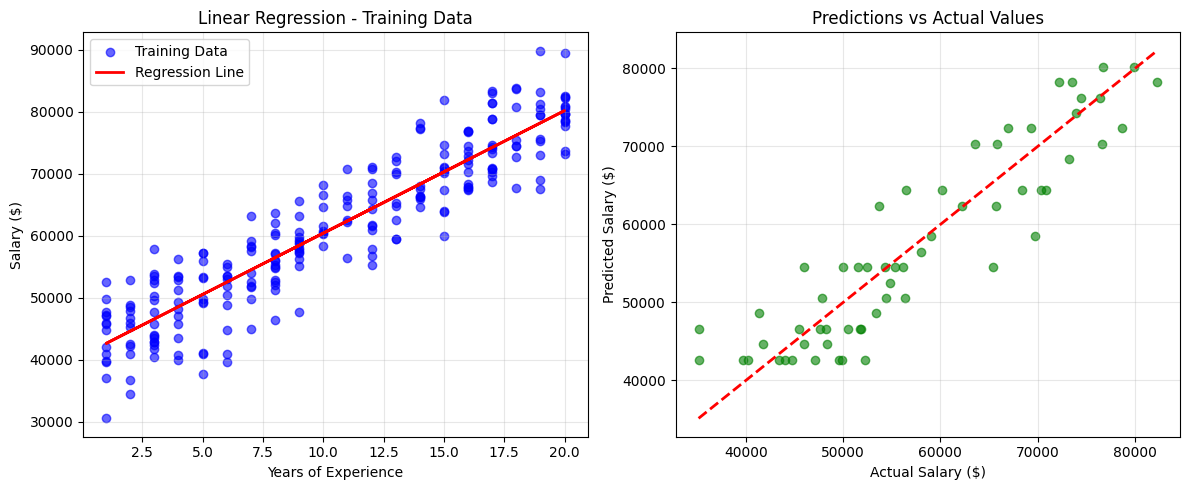

In [17]:
# -----------------------------
# Step 7: Visualization
# -----------------------------
plt.figure(figsize=(12, 5))

# Subplot 1: Training data with regression line
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Linear Regression - Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Predictions vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary ($)')
plt.ylabel('Predicted Salary ($)')
plt.title('Predictions vs Actual Values')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<h1>Section 10: Making Predictions on New Data</h1>

In [21]:

# Step 8: Predictions for New Data
# -----------------------------
new_experience = np.array([[6], [12], [15]])
new_predictions = model.predict(new_experience)

# Prepare DataFrame for new predictions
new_data_df = pd.DataFrame({
    'Years of Experience': new_experience.flatten(),
    'Predicted Salary ($)': new_predictions
})

# Format the salary with commas
new_data_df['Predicted Salary ($)'] = new_data_df['Predicted Salary ($)'].apply(lambda x: f"${x:,.2f}")

# Display the table
print("\nPredictions for New Data:")
print("="*40)
print(new_data_df.to_string(index=False))



Predictions for New Data:
 Years of Experience Predicted Salary ($)
                   6           $52,543.89
                  12           $64,398.83
                  15           $70,326.30
